<a href="https://colab.research.google.com/github/kitiluck/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

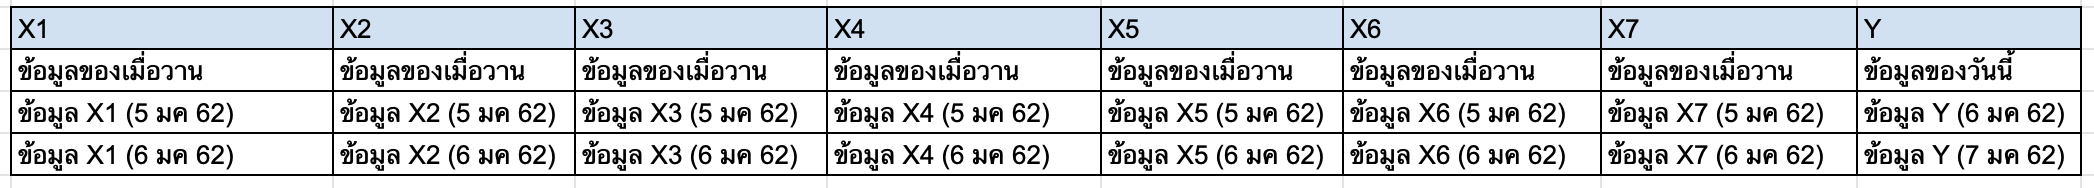

# Lode data

In [900]:
import pandas as pd
import numpy as np
import datetime as dt

# Load Excel from Drive

In [901]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [902]:
import os # os การเข้าไปใน path ใน google drive
os.chdir('/content/drive/MyDrive/BSC_DPDM2023')

!pwd #เช็ค path ที่กำลังทำงานอยู่

/content/drive/MyDrive/BSC_DPDM2023


## ความกดอากาศ

In [903]:
Air_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
Air_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
Air_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
Air_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
Air_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)


เปลี่ยนชื่อ column

In [904]:
Air_K.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Air_K.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Air_K.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Air_K.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Air_K['year'] = Air_K['เดือน-ปี'].dt.year
Air_K['month'] = Air_K['เดือน-ปี'].dt.month
Air_K = Air_K.drop(['เดือน-ปี'], axis =1)
Air_K.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667,2012,2


In [905]:
Air_NA.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Air_NA.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Air_NA.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Air_NA.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Air_NA['year'] = Air_NA['เดือน-ปี'].dt.year
Air_NA['month'] = Air_NA['เดือน-ปี'].dt.month
Air_NA = Air_NA.drop(['เดือน-ปี'], axis =1)
Air_NA.head()


,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,1010.68,...,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,1007.38,...,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,1012.96,...,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,1019.57,...,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,1011.78,...,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000,2012,2


In [906]:
Air_NO.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Air_NO.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Air_NO.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Air_NO.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Air_NO['year'] = Air_NO['เดือน-ปี'].dt.year
Air_NO['month'] = Air_NO['เดือน-ปี'].dt.month
Air_NO = Air_NO.drop(['เดือน-ปี'], axis =1)
Air_NO.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,1010.40,...,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,1007.65,...,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,1012.14,...,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,1019.33,...,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,1010.50,...,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667,2012,2


In [907]:
Air_S.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Air_S.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Air_S.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Air_S.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Air_S['year'] = Air_S['เดือน-ปี'].dt.year
Air_S['month'] = Air_S['เดือน-ปี'].dt.month
Air_S = Air_S.drop(['เดือน-ปี'], axis =1)
Air_S.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,1010.74,...,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,1007.41,...,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,1012.82,...,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,1019.52,...,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,1011.60,...,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000,2012,2


In [908]:
Air_L.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Air_L.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Air_L.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Air_L.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Air_L['year'] = Air_L['เดือน-ปี'].dt.year
Air_L['month'] = Air_L['เดือน-ปี'].dt.month
Air_L = Air_L.drop(['เดือน-ปี'], axis =1)
Air_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,1010.36,...,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,1007.65,...,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,1012.23,...,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,1018.10,...,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,1009.60,...,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667,2012,2


## ความชื้นสัมพัทธ์

In [909]:
Rhum_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
Rhum_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
Rhum_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
Rhum_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
Rhum_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)


เปลี่ยนชื่อ column


In [910]:
Rhum_K.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rhum_K.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rhum_K.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Rhum_K.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Rhum_K['year'] = Rhum_K['เดือน-ปี'].dt.year
Rhum_K['month'] = Rhum_K['เดือน-ปี'].dt.month
Rhum_K = Rhum_K.drop(['เดือน-ปี'], axis =1)
Rhum_K.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,73,69,69,75,71,71,68,79,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,65,67,68,67,67,65,-,68,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,60,62,65,66,63,64,63,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,75,71,75,69,70,67,68,69,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,48,57,71,73,68,-,-,65,2012,2


In [911]:
Rhum_NA.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rhum_NA.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rhum_NA.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Rhum_NA.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Rhum_NA['year'] = Rhum_NA['เดือน-ปี'].dt.year
Rhum_NA['month'] = Rhum_NA['เดือน-ปี'].dt.month
Rhum_NA = Rhum_NA.drop(['เดือน-ปี'], axis =1)
Rhum_NA.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,95,84,74,72,87,88,81,82,...,70,69,71,66,72,70,69,77,2011,10
1,2,357201-นครพนม จ.นครพนม,69,67,70,68,71,68,73,72,...,70,78,74,69,66,65,-,69,2011,11
2,3,357201-นครพนม จ.นครพนม,64,56,62,67,69,77,73,68,...,60,61,70,71,63,66,70,65,2011,12
3,1,357201-นครพนม จ.นครพนม,71,70,64,59,68,69,66,67,...,62,67,74,71,61,59,62,71,2012,1
4,2,357201-นครพนม จ.นครพนม,68,69,66,71,71,71,64,61,...,64,64,68,76,69,-,-,65,2012,2


In [912]:
Rhum_S.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rhum_S.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rhum_S.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Rhum_S.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Rhum_S['year'] = Rhum_S['เดือน-ปี'].dt.year
Rhum_S['month'] = Rhum_S['เดือน-ปี'].dt.month
Rhum_S = Rhum_S.drop(['เดือน-ปี'], axis =1)
Rhum_S.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,87,88,77,75,87,86,81,77,...,73,72,72,70,74,73,72,78,2011,10
1,2,356201-สกลนคร จ.สกลนคร,71,71,71,72,73,70,75,68,...,71,71,70,70,69,69,-,70,2011,11
2,3,356201-สกลนคร จ.สกลนคร,66,61,64,67,70,73,72,71,...,64,62,69,69,69,69,68,6,2011,12
3,1,356201-สกลนคร จ.สกลนคร,67,69,66,63,65,67,65,69,...,67,72,73,71,64,64,62,72,2012,1
4,2,356201-สกลนคร จ.สกลนคร,66,70,67,69,73,64,60,64,...,55,64,69,74,71,-,-,64,2012,2


In [913]:
Rhum_NO.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rhum_NO.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rhum_NO.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Rhum_NO.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Rhum_NO['year'] = Rhum_NO['เดือน-ปี'].dt.year
Rhum_NO['month'] = Rhum_NO['เดือน-ปี'].dt.month
Rhum_NO = Rhum_NO.drop(['เดือน-ปี'], axis =1)
Rhum_NO.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,89,91,78,75,90,88,87,74,...,68,71,70,71,70,66,68,76,2011,10
1,2,352201-หนองคาย จ.หนองคาย,68,66,66,67,68,69,68,73,...,65,67,68,69,71,69,-,68,2011,11
2,3,352201-หนองคาย จ.หนองคาย,67,62,66,66,65,68,71,67,...,61,58,67,71,70,67,68,65,2011,12
3,1,352201-หนองคาย จ.หนองคาย,67,70,68,65,73,68,66,69,...,71,68,71,69,65,68,73,70,2012,1
4,2,352201-หนองคาย จ.หนองคาย,68,71,91,79,78,71,67,69,...,61,62,69,76,69,-,-,69,2012,2


In [914]:
Rhum_L.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rhum_L.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rhum_L.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Rhum_L.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Rhum_L['year'] = Rhum_L['เดือน-ปี'].dt.year
Rhum_L['month'] = Rhum_L['เดือน-ปี'].dt.month
Rhum_L = Rhum_L.drop(['เดือน-ปี'], axis =1)
Rhum_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,90,95,92,89,86,94,90,88,...,83,84,85,85,82,83,85,87,2011,10
1,2,353301-เลย สกษ. จ.เลย,85,83,84,83,83,85,83,82,...,80,81,80,84,82,79,-,82,2011,11
2,3,353301-เลย สกษ. จ.เลย,80,77,77,76,78,83,82,79,...,75,74,80,80,78,81,78,77,2011,12
3,1,353301-เลย สกษ. จ.เลย,75,78,81,79,73,77,82,78,...,83,79,80,78,77,82,79,78,2012,1
4,2,353301-เลย สกษ. จ.เลย,79,81,91,84,78,73,69,71,...,68,67,76,73,70,-,-,73,2012,2


## ความเร็วลม

In [915]:
Wind_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
Wind_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
Wind_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
Wind_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
Wind_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)

เปลี่ยนชื่อ column

In [916]:
Wind_K.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_K.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_K.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Wind_K.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Wind_K['year'] = Wind_K['เดือน-ปี'].dt.year
Wind_K['month'] = Wind_K['เดือน-ปี'].dt.month
Wind_K = Wind_K.drop(['เดือน-ปี'], axis =1)
Wind_K.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,3,2,3,2,2,3,4,3,...,5,5,5,4,6,4,5,3.354839,2011,10
1,2,353301-เลย สกษ. จ.เลย,4,5,3,3,5,2,3,3,...,5,5,3,1,3,3,-,3.466667,2011,11
2,3,353301-เลย สกษ. จ.เลย,3,4,4,4,4,4,4,4,...,7,6,5,4,4,6,5,4.806452,2011,12
3,1,353301-เลย สกษ. จ.เลย,4,2,1,4,4,2,4,6,...,4,2,2,1,3,4,4,3.129032,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3,2,3,1,2,3,...,3,2,4,3,3,3,-,2.566667,2012,2


In [917]:
Wind_NA.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_NA.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_NA.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Wind_NA.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Wind_NA['year'] = Wind_NA['เดือน-ปี'].dt.year
Wind_NA['month'] = Wind_NA['เดือน-ปี'].dt.month
Wind_NA = Wind_NA.drop(['เดือน-ปี'], axis =1)
Wind_NA.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2,1,0,2,1,...,2,1,2,2,1,1,1,1.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1,1,1,1,1,...,2,2,1,1,1,1,-,1.200000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1,1,1,1,2,...,3,1,2,1,1,2,2,1.741935,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5,2,3,3,4,...,5,1,1,1,4,5,4,2.448276,2012,1
4,2,353301-เลย สกษ. จ.เลย,1,3,4,0,0,1,1,4,...,2,3,3,3,1,2,-,2.200000,2012,2


In [918]:
Wind_S.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_S.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_S.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Wind_S.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Wind_S['year'] = Wind_S['เดือน-ปี'].dt.year
Wind_S['month'] = Wind_S['เดือน-ปี'].dt.month
Wind_S = Wind_S.drop(['เดือน-ปี',], axis =1)
Wind_S.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2,1,0,2,1,...,2,1,2,2,1,1,1,1.322581,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1,1,1,1,1,...,2,2,1,1,1,1,-,1.200000,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1,1,1,1,2,...,3,1,2,1,1,2,2,1.741935,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5,3,2,4,3,...,5,3,2,3,3,3,4,2.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2,1,2,2,3,...,1,3,7,5,3,2,-,2.733333,2012,2


In [919]:
Wind_NO.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_NO.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_NO.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Wind_NO.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Wind_NO['year'] = Wind_NO['เดือน-ปี'].dt.year
Wind_NO['month'] = Wind_NO['เดือน-ปี'].dt.month
Wind_NO = Wind_NO.drop(['เดือน-ปี'], axis =1)
Wind_NO.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,1,4,4,2,1,3,1,2,...,3,3,3,3,3,3,4,2.580645,2011,10
1,2,353301-เลย สกษ. จ.เลย,3,3,3,2,2,1,2,3,...,2,3,2,2,2,2,-,2.433333,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,5,3,2,2,2,2,4,...,5,4,2,2,2,3,2,3.161290,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5,3,2,4,3,...,5,3,2,3,3,3,4,2.870968,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2,1,2,2,3,...,1,3,7,5,3,2,-,2.733333,2012,2


In [920]:
Wind_L.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_L.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_L.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Wind_L.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Wind_L['year'] = Wind_L['เดือน-ปี'].dt.year
Wind_L['month'] = Wind_L['เดือน-ปี'].dt.month
Wind_L = Wind_L.drop(['เดือน-ปี'], axis =1)
Wind_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,2,2,3,2,3,2,1,1,...,2,2,1,2,2,2,1,1.612903,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,2,1,1,2,2,2,2,...,1,1,2,1,2,1,-,1.700000,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,2,3,2,1,2,1,1,...,3,2,1,2,1,2,2,1.870968,2011,12
3,1,353301-เลย สกษ. จ.เลย,2,2,1,2,2,2,2,2,...,3,2,2,2,2,1,1,1.838710,2012,1
4,2,353301-เลย สกษ. จ.เลย,1,2,2,1,1,2,1,2,...,1,1,3,4,2,1,-,1.700000,2012,2


## จำนวนเมฆ

In [921]:
Cloud_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4,dtype={'Unnamed: 34':int})
Cloud_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4,dtype={'Unnamed: 34':int})
Cloud_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4,dtype={'Unnamed: 34':int})
Cloud_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4,dtype={'Unnamed: 34':int})
Cloud_Li = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4,dtype={'Unnamed: 34':int})

เปลี่ยนชื่อ column

In [922]:
Cloud_K.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Cloud_K.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Cloud_K.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Cloud_K.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Cloud_K['year'] = Cloud_K['เดือน-ปี'].dt.year
Cloud_K['month'] = Cloud_K['เดือน-ปี'].dt.month
Cloud_K = Cloud_K.drop(['เดือน-ปี'], axis =1)
Cloud_K.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,9,10,10,8,10,10,10,7,...,5,3,3,5,4,2,2,6,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,2,2,2,3,6,9,6,...,3,2,2,1,3,2,-,3,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,3,4,4,5,8,7,6,...,3,3,1,2,1,1,1,3,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,4,7,6,3,1,3,3,...,4,3,2,5,6,10,10,5,2012,1
4,2,353301-เลย สกษ. จ.เลย,6,6,8,8,3,3,1,2,...,0,1,4,5,1,2,-,2,2012,2


In [923]:
Cloud_NA.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Cloud_NA.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Cloud_NA.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Cloud_NA.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Cloud_NA['year'] = Cloud_NA['เดือน-ปี'].dt.year
Cloud_NA['month'] = Cloud_NA['เดือน-ปี'].dt.month
Cloud_NA = Cloud_NA.drop(['เดือน-ปี'], axis =1)
Cloud_NA.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,10,7,8,8,10,10,9,4,...,2,2,3,3,4,2,4,5,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,2,2,3,5,7,9,6,...,4,2,2,2,1,1,-,3,2011,11
2,3,353301-เลย สกษ. จ.เลย,2,2,2,4,4,7,8,3,...,2,2,2,1,2,1,1,3,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,1,4,6,4,2,5,6,...,2,2,2,3,3,6,5,4,2012,1
4,2,353301-เลย สกษ. จ.เลย,5,5,8,7,3,3,2,1,...,2,3,7,6,2,1,-,2,2012,2


In [924]:
Cloud_S.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Cloud_S.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Cloud_S.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Cloud_S.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Cloud_S['year'] = Cloud_S['เดือน-ปี'].dt.year
Cloud_S['month'] = Cloud_S['เดือน-ปี'].dt.month
Cloud_S = Cloud_S.drop(['เดือน-ปี'], axis =1)
Cloud_S.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,9,9,7,7,9,10,8,6,...,2,1,1,3,3,1,4,5,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,0,0,1,3,7,8,5,...,1,1,1,1,1,0,-,2,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,1,2,2,2,6,6,4,...,-,0,0,0,0,1,-,2,2011,12
3,1,353301-เลย สกษ. จ.เลย,0,0,4,3,2,0,1,2,...,0,3,0,1,4,7,8,3,2012,1
4,2,353301-เลย สกษ. จ.เลย,4,4,8,5,1,0,0,0,...,-,1,6,4,0,0,-,2,2012,2


In [925]:
Cloud_NO.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Cloud_NO.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Cloud_NO.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Cloud_NO.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Cloud_NO['year'] = Cloud_NO['เดือน-ปี'].dt.year
Cloud_NO['month'] = Cloud_NO['เดือน-ปี'].dt.month
Cloud_NO = Cloud_NO.drop(['เดือน-ปี'], axis =1)
Cloud_NO.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,10,10,8,9,9,10,10,6,...,1,2,1,1,1,4,3,5,2011,10
1,2,353301-เลย สกษ. จ.เลย,1,0,0,1,1,2,6,4,...,-,0,1,2,4,2,-,2,2011,11
2,3,353301-เลย สกษ. จ.เลย,4,4,-,2,7,5,5,5,...,1,-,3,1,1,3,-,3,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,1,3,6,8,2,3,4,...,6,6,1,0,6,10,9,4,2012,1
4,2,353301-เลย สกษ. จ.เลย,7,8,10,6,1,-,-,-,...,-,-,6,5,6,NaN,-,4,2012,2


ตัดจำนวน column ที่เกิน

In [926]:
Cloud_L = Cloud_Li.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])
Cloud_L.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2


In [927]:
Cloud_L.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Cloud_L.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Cloud_L.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Cloud_L.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Cloud_L['year'] = Cloud_L['เดือน-ปี'].dt.year
Cloud_L['month'] = Cloud_L['เดือน-ปี'].dt.month
Cloud_L = Cloud_L.drop(['เดือน-ปี'], axis =1)
Cloud_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353301-เลย สกษ. จ.เลย,8,10,10,9,8,10,10,7,...,2,4,2,3,3,1,2,5,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,1,2,1,1,1,2,2,...,0,1,2,2,5,3,-,2,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,3,1,3,3,2,3,5,...,1,0,0,1,1,4,1,2,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,1,3,6,6,2,1,1,...,6,5,1,2,4,9,8,3,2012,1
4,2,353301-เลย สกษ. จ.เลย,8,5,10,7,1,0,-,-,...,-,0,1,3,-,3,-,2,2012,2


## ปริมาณฝน

In [928]:
Rainfall_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
Rainfall_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
Rainfall_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
Rainfall_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
Rainfall_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)

เปลี่ยนชื่อ column

In [929]:
Rainfall_K.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_K.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_K.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Rainfall_K.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Rainfall_K['year'] = Rainfall_K['เดือน-ปี'].dt.year
Rainfall_K['month'] = Rainfall_K['เดือน-ปี'].dt.month
Rainfall_K = Rainfall_K.drop(['เดือน-ปี'], axis =1)
Rainfall_K.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,1.4,17.7,3,0,2.2,0.5,1.3,0.2,...,T,0,0.5,1.1,0,0,0,176.8,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,3.2,...,0,0,0,0,0,0,-,11.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,0,...,0,0,0,0,0,T,0,38.7,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,0,0,T,0,0,0,0,0,...,0,0,0,0,0,-,-,T,2012,2


In [930]:
Rainfall_NA.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_NA.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_NA.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Rainfall_NA.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Rainfall_NA['year'] = Rainfall_NA['เดือน-ปี'].dt.year
Rainfall_NA['month'] = Rainfall_NA['เดือน-ปี'].dt.month
Rainfall_NA = Rainfall_NA.drop(['เดือน-ปี'], axis =1)
Rainfall_NA.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,17,0.3,0,0.3,1.9,T,0,0.8,...,0,0,0,0,0,0,0,75.4,2011,10
1,2,357201-นครพนม จ.นครพนม,0,0,0,0,T,T,0,0,...,0,0,0.5,0,0,0,-,0.5,2011,11
2,3,357201-นครพนม จ.นครพนม,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,2011,12
3,1,357201-นครพนม จ.นครพนม,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14.9,2012,1
4,2,357201-นครพนม จ.นครพนม,0,0,T,0,0,0,0,0,...,0,0,1.2,0,0,-,-,1.2,2012,2


In [931]:
Rainfall_S.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_S.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_S.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Rainfall_S.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Rainfall_S['year'] = Rainfall_S['เดือน-ปี'].dt.year
Rainfall_S['month'] = Rainfall_S['เดือน-ปี'].dt.month
Rainfall_S = Rainfall_S.drop(['เดือน-ปี'], axis =1)
Rainfall_S.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,84.8,28.1,0,T,5.5,0.3,0,0.3,...,0,0,0,0,1,0,0,200.8,2011,10
1,2,356201-สกลนคร จ.สกลนคร,0,0,0,0,T,T,2.8,0,...,0,0,0,0,0,0,-,2.8,2011,11
2,3,356201-สกลนคร จ.สกลนคร,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,2011,12
3,1,356201-สกลนคร จ.สกลนคร,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,30.4,2012,1
4,2,356201-สกลนคร จ.สกลนคร,0,0,0,0,0,0,0,0,...,0,0.4,5.6,0,0,-,-,6,2012,2


In [932]:
Rainfall_NO.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_NO.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_NO.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Rainfall_NO.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Rainfall_NO['year'] = Rainfall_NO['เดือน-ปี'].dt.year
Rainfall_NO['month'] = Rainfall_NO['เดือน-ปี'].dt.month
Rainfall_NO = Rainfall_NO.drop(['เดือน-ปี'], axis =1)
Rainfall_NO.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,48.6,59,0,1,19.1,6.2,0.2,0,...,0,0,0,0,0,0,0,184.3,2011,10
1,2,352201-หนองคาย จ.หนองคาย,0,0,0,0,0,0,0,0.9,...,0,0,0,0,0,0,-,5.1,2011,11
2,3,352201-หนองคาย จ.หนองคาย,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,2011,12
3,1,352201-หนองคาย จ.หนองคาย,0,0,0,0,1.1,0,0,0,...,0,0,0,0,0,0,0.4,3.4,2012,1
4,2,352201-หนองคาย จ.หนองคาย,0,28.7,9.1,0,0,0,0,0,...,0,0,6.1,0,0,-,-,43.9,2012,2


In [933]:
Rainfall_L.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_L.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_L.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Rainfall_L.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Rainfall_L['year'] = Rainfall_L['เดือน-ปี'].dt.year
Rainfall_L['month'] = Rainfall_L['เดือน-ปี'].dt.month
Rainfall_L = Rainfall_L.drop(['เดือน-ปี'], axis =1)
Rainfall_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353201-เลย จ.เลย,21.6,111.4,0.4,0,0,3.4,1.8,0.6,...,0,0,0,0.2,0,0,0,183,2011,10
1,2,353201-เลย จ.เลย,0,0,0,0,0,0,0,0,...,0,0,0,0.6,0,0,-,7.4,2011,11
2,3,353201-เลย จ.เลย,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.2,2011,12
3,1,353201-เลย จ.เลย,0,0,0,0,0,0,0,0,...,0,0,0,0,0,T,0,18.2,2012,1
4,2,353201-เลย จ.เลย,0,0.2,1.2,0,0,0,0,0,...,0,0,1,0,0,-,-,2.4,2012,2


##  อุณหภูมิจุดน้ำค้าง

In [934]:
Dew_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dew_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dew_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dew_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dew_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)

เปลี่ยนชื่อ column

In [935]:
Dew_K.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Dew_K.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Dew_K.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Dew_K.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Dew_K['year'] = Dew_K['เดือน-ปี'].dt.year
Dew_K['month'] = Dew_K['เดือน-ปี'].dt.month
Dew_K = Dew_K.drop(['เดือน-ปี'], axis =1)
Dew_K.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,16.7,18.3,19.2,18.9,19,18.3,-,18.910000,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,16.3,18.8,22.3,22.1,21.3,-,-,18.772414,2012,2


In [936]:
Dew_NA.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Dew_NA.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Dew_NA.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Dew_NA.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Dew_NA['year'] = Dew_NA['เดือน-ปี'].dt.year
Dew_NA['month'] = Dew_NA['เดือน-ปี'].dt.month
Dew_NA = Dew_NA.drop(['เดือน-ปี'], axis =1)
Dew_NA.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.1,23.1,20.1,18.9,20.7,21.1,21.7,22.2,...,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000,2011,10
1,2,357201-นครพนม จ.นครพนม,19.2,18.8,19.1,19.8,20.3,20.9,21.7,20.6,...,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667,2011,11
2,3,357201-นครพนม จ.นครพนม,17.6,12.7,12.2,14.1,16.0,18.5,19.7,17.2,...,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935,2011,12
3,1,357201-นครพนม จ.นครพนม,15.6,16.4,17.1,14.7,13.8,14.7,14.0,13.9,...,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516,2012,1
4,2,357201-นครพนม จ.นครพนม,16.3,17.8,16.6,17.9,19.3,20.7,19.6,16.4,...,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667,2012,2


In [937]:
Dew_S.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Dew_S.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Dew_S.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Dew_S.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Dew_S['year'] = Dew_S['เดือน-ปี'].dt.year
Dew_S['month'] = Dew_S['เดือน-ปี'].dt.month
Dew_S = Dew_S.drop(['เดือน-ปี'], axis =1)
Dew_S.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.6,21.1,20.0,21.2,20.8,21.9,22.0,...,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032,2011,10
1,2,356201-สกลนคร จ.สกลนคร,19.6,19.4,19.5,20.0,20.9,21.4,21.7,20.4,...,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333,2011,11
2,3,356201-สกลนคร จ.สกลนคร,18.0,14.0,12.3,14.1,15.7,18.1,19.5,18.2,...,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000,2011,12
3,1,356201-สกลนคร จ.สกลนคร,15.3,16.3,17.0,15.6,13.5,14.6,13.6,13.7,...,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161,2012,1
4,2,356201-สกลนคร จ.สกลนคร,15.9,18.0,16.6,17.6,20.2,19.7,18.8,16.6,...,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333,2012,2


In [938]:
Dew_NO.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Dew_NO.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Dew_NO.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Dew_NO.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Dew_NO['year'] = Dew_NO['เดือน-ปี'].dt.year
Dew_NO['month'] = Dew_NO['เดือน-ปี'].dt.month
Dew_NO = Dew_NO.drop(['เดือน-ปี'], axis =1)
Dew_NO.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,24.6,23.8,22.4,21.9,23.3,22.0,23.0,22.7,...,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194,2011,10
1,2,352201-หนองคาย จ.หนองคาย,19.3,19.0,18.7,19.1,20.2,20.7,21.5,21.9,...,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,18.4,15.5,14.4,14.6,15.6,17.7,19.0,19.5,...,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613,2011,12
3,1,352201-หนองคาย จ.หนองคาย,16.4,17.6,18.3,16.9,15.4,16.2,15.8,15.4,...,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258,2012,1
4,2,352201-หนองคาย จ.หนองคาย,17.5,18.8,20.0,19.8,21.3,21.2,19.8,18.9,...,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000,2012,2


In [939]:
Dew_L.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Dew_L.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Dew_L.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Dew_L.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Dew_L['year'] = Dew_L['เดือน-ปี'].dt.year
Dew_L['month'] = Dew_L['เดือน-ปี'].dt.month
Dew_L = Dew_L.drop(['เดือน-ปี'], axis =1)
Dew_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353201-เลย จ.เลย,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,...,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548,2011,10
1,2,353201-เลย จ.เลย,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,...,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333,2011,11
2,3,353201-เลย จ.เลย,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,...,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484,2011,12
3,1,353201-เลย จ.เลย,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,...,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613,2012,1
4,2,353201-เลย จ.เลย,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,...,17.1,16.7,18.7,18.6,16.9,-,-,17.310345,2012,2


## อุณหภูมิต่ำสุด

In [940]:
Lower_K= pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Lower_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Lower_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
Lower_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Lower_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)

เปลี่ยนชื่อ column

In [941]:
Lower_K.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Lower_K.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Lower_K.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Lower_K.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Lower_K['year'] = Lower_K['เดือน-ปี'].dt.year
Lower_K['month'] = Lower_K['เดือน-ปี'].dt.month
Lower_K = Lower_K.drop(['เดือน-ปี'], axis =1)
Lower_K.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.1,21.3,23.4,22,22.2,-,-,20.1,2012,2


In [942]:
Lower_NA.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Lower_NA.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Lower_NA.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Lower_NA.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Lower_NA['year'] = Lower_NA['เดือน-ปี'].dt.year
Lower_NA['month'] = Lower_NA['เดือน-ปี'].dt.month
Lower_NA = Lower_NA.drop(['เดือน-ปี'], axis =1)
Lower_NA.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.0,23.4,22.2,20.6,21.1,21.0,22.5,21.4,...,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4,2011,10
1,2,357201-นครพนม จ.นครพนม,20.4,20.5,19.7,20.6,21.3,23.7,24.4,22.8,...,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4,2011,11
2,3,357201-นครพนม จ.นครพนม,19.4,19.8,14.1,14.5,15,18.1,20.7,19.8,...,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1,2011,12
3,1,357201-นครพนม จ.นครพนม,15.1,15.5,19.9,21.7,14.9,13.8,15.9,14.4,...,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9,2012,1
4,2,357201-นครพนม จ.นครพนม,17.3,18.2,21.5,19.1,20.1,21.3,21.4,20.9,...,21.3,22.5,21.8,18.6,19,-,-,19.2,2012,2


In [943]:
Lower_S.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Lower_S.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Lower_S.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Lower_S.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Lower_S['year'] = Lower_S['เดือน-ปี'].dt.year
Lower_S['month'] = Lower_S['เดือน-ปี'].dt.month
Lower_S = Lower_S.drop(['เดือน-ปี'], axis =1)
Lower_S.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.1,22.6,21.8,22.5,21.1,23.0,23.4,...,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7,2011,10
1,2,356201-สกลนคร จ.สกลนคร,20.5,20.5,20.4,20.6,21.5,24.0,24.3,22.7,...,18.5,19.0,19.8,20,19.9,19.6,-,20.5,2011,11
2,3,356201-สกลนคร จ.สกลนคร,19.5,19.3,14.0,15.3,15.8,18.0,21.2,20.0,...,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9,2011,12
3,1,356201-สกลนคร จ.สกลนคร,16.9,16.5,18.6,19.9,15.3,15.0,16.0,14.5,...,17.1,14.6,17.3,20,19.4,20,18.7,18.2,2012,1
4,2,356201-สกลนคร จ.สกลนคร,18.3,19.0,19.8,19.3,20.2,20.5,21.5,19.1,...,21.0,20.9,20.8,19.3,19.4,-,-,19.0,2012,2


In [944]:
Lower_NO.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Lower_NO.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Lower_NO.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Lower_NO.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Lower_NO['year'] = Lower_NO['เดือน-ปี'].dt.year
Lower_NO['month'] = Lower_NO['เดือน-ปี'].dt.month
Lower_NO = Lower_NO.drop(['เดือน-ปี'], axis =1)
Lower_NO.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,25.3,23.3,23.6,23.8,23.3,22.0,22.5,23.8,...,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5,2011,10
1,2,352201-หนองคาย จ.หนองคาย,21.2,21.4,21.0,21.3,22.0,22.6,24.2,24.0,...,18.0,19.2,20.0,21,21.1,20.1,-,21.0,2011,11
2,3,352201-หนองคาย จ.หนองคาย,20.0,20.1,15.0,15.5,17.2,18.8,20.8,21.6,...,12.0,11.1,12.7,16,18,18.8,17.5,16.7,2011,12
3,1,352201-หนองคาย จ.หนองคาย,17.1,17.8,19.3,20.5,17.8,16.8,16.8,15.5,...,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0,2012,1
4,2,352201-หนองคาย จ.หนองคาย,19.6,20.0,19.5,19.7,20.1,21.8,21.3,20.3,...,20.7,22.2,23.0,20.7,21.4,-,-,20.2,2012,2


In [945]:
Lower_L.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Lower_L.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Lower_L.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Lower_L.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Lower_L['year'] = Lower_L['เดือน-ปี'].dt.year
Lower_L['month'] = Lower_L['เดือน-ปี'].dt.month
Lower_L = Lower_L.drop(['เดือน-ปี'], axis =1)
Lower_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353201-เลย จ.เลย,23.5,24.3,22.5,23.0,22.7,23.2,21.0,22.8,...,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2,2011,10
1,2,353201-เลย จ.เลย,20.7,19.9,19.1,19.0,19.5,19.8,20.5,21.5,...,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2,2011,11
2,3,353201-เลย จ.เลย,18,19.6,15.5,14.4,17.1,15.5,17.2,20.5,...,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2,2011,12
3,1,353201-เลย จ.เลย,16,16.1,17.9,20.9,19.6,16.8,17.0,14.7,...,19.0,18.9,16.8,19,21,21.3,20.5,18.2,2012,1
4,2,353201-เลย จ.เลย,19,19.0,21.7,20.2,18.9,18.0,16.5,16.9,...,18.5,18.5,20.0,20.1,18.4,-,-,18.6,2012,2


## อุณหภูมิตุ้มแห้ง


In [946]:
Dry_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dry_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dry_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dry_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dry_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)

เปลี่ยนชื่อ column

In [947]:
Dry_K.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Dry_K.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Dry_K.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Dry_K.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Dry_K['year'] = Dry_K['เดือน-ปี'].dt.year
Dry_K['month'] = Dry_K['เดือน-ปี'].dt.month
Dry_K = Dry_K.drop(['เดือน-ปี'], axis =1)
Dry_K.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,27.6,25.6,25.6,25.8,24.3,24.0,25.1,27.0,...,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,26.3,26.3,26.3,26.6,26.8,27.5,27.9,28.0,...,24.4,25.5,26.1,26.2,26,26,-,25.8,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,25.4,23.9,21.3,22.3,23.0,25.6,25.4,25.7,...,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,23.8,24.5,25.0,24.8,22.8,23.4,23.1,22.6,...,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,23.9,25.4,25.3,24.8,27.2,28.2,28.3,26.4,...,29.6,29.2,28.2,27.5,28.5,-,-,26.5,2012,2


In [948]:
Dry_NA.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Dry_NA.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Dry_NA.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Dry_NA.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Dry_NA['year'] = Dry_NA['เดือน-ปี'].dt.year
Dry_NA['month'] = Dry_NA['เดือน-ปี'].dt.month
Dry_NA = Dry_NA.drop(['เดือน-ปี'], axis =1)
Dry_NA.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,357201-นครพนม จ.นครพนม,25.9,26.1,25.3,24.7,23.1,23.2,25.6,25.7,...,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0,2011,10
1,2,357201-นครพนม จ.นครพนม,25.8,25.8,25.5,26.8,26.5,27.8,27.3,26.3,...,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5,2011,11
2,3,357201-นครพนม จ.นครพนม,25.4,22.1,20.4,21.3,22.6,23.1,25.2,24.2,...,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3,2011,12
3,1,357201-นครพนม จ.นครพนม,21.7,22.8,24.7,23.4,20.3,21.2,21.1,20.7,...,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6,2012,1
4,2,357201-นครพนม จ.นครพนม,23.0,24.3,23.4,24.0,25.6,27.3,27.8,24.6,...,28.5,27.4,23.8,22.4,26.7,-,-,25.1,2012,2


In [949]:
Dry_S.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Dry_S.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Dry_S.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Dry_S.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Dry_S['year'] = Dry_S['เดือน-ปี'].dt.year
Dry_S['month'] = Dry_S['เดือน-ปี'].dt.month
Dry_S = Dry_S.drop(['เดือน-ปี'], axis =1)
Dry_S.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,356201-สกลนคร จ.สกลนคร,26.9,25.9,25.7,25.2,23.6,23.5,25.6,26.7,...,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0,2011,10
1,2,356201-สกลนคร จ.สกลนคร,25.7,25.5,25.5,26.1,26.7,27.8,26.7,27.2,...,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3,2011,11
2,3,356201-สกลนคร จ.สกลนคร,25.4,22.4,19.9,21.0,22.0,23.5,25.2,24.4,...,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1,2011,12
3,1,356201-สกลนคร จ.สกลนคร,22.2,22.7,24.3,23.3,20.5,21.4,20.9,20.2,...,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6,2012,1
4,2,356201-สกลนคร จ.สกลนคร,23.0,24.1,23.1,23.8,25.9,27.8,28.1,24.0,...,28.6,27.4,24.4,23.8,26.3,-,-,25.0,2012,2


In [950]:
Dry_NO.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Dry_NO.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Dry_NO.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Dry_NO.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Dry_NO['year'] = Dry_NO['เดือน-ปี'].dt.year
Dry_NO['month'] = Dry_NO['เดือน-ปี'].dt.month
Dry_NO = Dry_NO.drop(['เดือน-ปี'], axis =1)
Dry_NO.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,26.7,25.5,27.0,26.8,24.9,24.3,25.4,28.2,...,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0,2011,10
1,2,352201-หนองคาย จ.หนองคาย,26.3,26.4,26.3,26.5,27.1,27.4,28.3,27.6,...,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9,2011,11
2,3,352201-หนองคาย จ.หนองคาย,25.6,23.6,21.4,21.9,23.2,24.7,24.9,26.7,...,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1,2011,12
3,1,352201-หนองคาย จ.หนองคาย,23.4,23.9,25.1,24.3,20.7,22.8,22.8,21.6,...,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8,2012,1
4,2,352201-หนองคาย จ.หนองคาย,24.1,24.6,21.7,23.9,26.1,27.7,27.4,25.4,...,27.4,28.3,25.8,25.5,26.9,-,-,25.6,2012,2


In [951]:
Dry_L.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Dry_L.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Dry_L.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Dry_L.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Dry_L['year'] = Dry_L['เดือน-ปี'].dt.year
Dry_L['month'] = Dry_L['เดือน-ปี'].dt.month
Dry_L = Dry_L.drop(['เดือน-ปี'], axis =1)
Dry_L.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,353201-เลย จ.เลย,26.3,25.1,24.4,25.2,25.6,23.7,24.6,26.2,...,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6,2011,10
1,2,353201-เลย จ.เลย,25.3,24.7,24.5,24.4,24.9,25.4,25.8,26.3,...,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4,2011,11
2,3,353201-เลย จ.เลย,23.9,22.9,21.0,20.9,22.3,21.6,23.8,26.0,...,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1,2011,12
3,1,353201-เลย จ.เลย,22.7,22.9,24.1,24.3,23.3,23.0,22.2,21.3,...,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3,2012,1
4,2,353201-เลย จ.เลย,23.4,24.2,23.2,24.0,25.6,26.3,25.9,25.4,...,26.9,26.8,26.5,26.7,26.7,-,-,25.4,2012,2


## ตรวจสอบขนาดข้อมูล

In [952]:
Dew_L.shape

(50, 36)

In [953]:
Dry_L.shape

(50, 36)

In [954]:
Air_L.shape

(55, 36)

จำนวนขนาดข้อมูลของ อุณหภูมิจุดน้ำค้าง และ อุณหภูมิตุ้มเเห้ง มีจำนวน ไม่เท่ากับ ข้อมูลอื่น

# เช็คค่า missing data และ แก้ค่า missing ด้วยค่าเฉลี่ย

#### เปลี่ยนค่า - ด้วย replace

In [955]:
## ความกดอากาศ
Air_KK = Air_K.replace('-',np.NaN) # เปลี่ยน - เป็น NaN

In [956]:
Air_KK

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,NaN,1009.749667,2012,2
5,3,352201-หนองคาย จ.หนองคาย,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,1010.07,...,1009.78,1009.08,1008.67,1008.41,1008.71,1008.70,1011.83,1010.386452,2012,10
6,4,352201-หนองคาย จ.หนองคาย,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,1008.36,...,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,NaN,1010.464333,2012,11
7,5,352201-หนองคาย จ.หนองคาย,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,1011.34,...,1013.54,1011.60,1010.58,1009.61,1009.90,1011.64,1014.86,1011.622581,2012,12
8,6,352201-หนองคาย จ.หนองคาย,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,1011.64,...,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677,2013,1
9,7,352201-หนองคาย จ.หนองคาย,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,1008.48,...,1011.79,1010.17,1007.95,1006.82,NaN,NaN,NaN,1011.207500,2013,2


In [957]:
Air_NA1 = Air_NA.replace('-',np.NaN)
Air_S1 = Air_S.replace('-',np.NaN)
Air_NO1 = Air_NO.replace('-',np.NaN)
Air_L1 = Air_L.replace('-',np.NaN)

In [958]:
## ความชื้นสัมพัทธ์
Rhum_K1 = Rhum_K.replace('-',np.NaN)
Rhum_NA1 = Rhum_NA.replace('-',np.NaN)
Rhum_S1 = Rhum_S .replace('-',np.NaN)
Rhum_NO1 = Rhum_NO.replace('-',np.NaN)
Rhum_L1 = Rhum_L.replace('-',np.NaN)

In [959]:
## ความเร็วลม
Wind_K1 = Wind_K.replace('-',np.NaN)
Wind_NA1 = Wind_NA.replace('-',np.NaN)
Wind_S1 = Wind_S .replace('-',np.NaN)
Wind_NO1 = Wind_NO.replace('-',np.NaN)
Wind_L1 = Wind_L.replace('-',np.NaN)

In [960]:
## จำนวนเมฆ
Cloud_K1 = Cloud_K.replace('-',np.NaN)
Cloud_NA1 = Cloud_NA.replace('-',np.NaN)
Cloud_S1 = Cloud_S .replace('-',np.NaN)
Cloud_NO1 = Cloud_NO.replace('-',np.NaN)
Cloud_L1 = Cloud_L.replace('-',np.NaN)

In [961]:
## ปริมาณฝน
Rainfall_K1 = Rainfall_K.replace('-',np.NaN)
Rainfall_NA1 = Rainfall_NA.replace('-',np.NaN)
Rainfall_S1 = Rainfall_S .replace('-',np.NaN)
Rainfall_NO1 = Rainfall_NO.replace('-',np.NaN)
Rainfall_L1 = Rainfall_L.replace('-',np.NaN)

## ปริมาณฝน แทนค่า T
Rainfall_K2 = Rainfall_K1.replace('T',0.09)
Rainfall_NA2 = Rainfall_NA1.replace('T',0.09)
Rainfall_S2 = Rainfall_S1 .replace('T',0.09)
Rainfall_NO2 = Rainfall_NO1.replace('T',0.09)
Rainfall_L2 = Rainfall_L1.replace('T',0.09)

In [962]:
## อุณหภูมิจุดน้ำค้าง
Dew_K1 = Dew_K.replace('-',np.NaN)
Dew_NA1 = Dew_NA.replace('-',np.NaN)
Dew_S1 = Dew_S .replace('-',np.NaN)
Dew_NO1 = Dew_NO.replace('-',np.NaN)
Dew_L1 = Dew_L.replace('-',np.NaN)

In [963]:
## อุณหภูมิต่ำสุด
Lower_K1 = Lower_K.replace('-',np.NaN)
Lower_NA1 = Lower_NA.replace('-',np.NaN)
Lower_S1 = Lower_S .replace('-',np.NaN)
Lower_NO1 = Lower_NO.replace('-',np.NaN)
Lower_L1 = Lower_L.replace('-',np.NaN)

In [964]:
## อุณหภูมิตุ้มแห้ง
Dry_K1 = Dry_K.replace('-',np.NaN)
Dry_NA1 = Dry_NA.replace('-',np.NaN)
Dry_S1 = Dry_S .replace('-',np.NaN)
Dry_NO1 = Dry_NO.replace('-',np.NaN)
Dry_L1 = Dry_L.replace('-',np.NaN)

## แก้ค่า Missing data เป็นค่าเฉลี่ย ด้วยการแทนค่า เฉลี่ยใน NaN

In [965]:
## ความกดอากาศ
for i in range(len(Air_KK['ที่'])):
  Air_KK.iloc[i,:] = Air_KK.iloc[i,:].fillna(Air_KK.iloc[i]['ค่าเฉลี่ย'])

In [966]:
Dry_NA1.isnull().any() # เช็คค่า Missing

ที่          False
สถานี        False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
year         False
month        False
dtype: bool

In [967]:
for i in range(len(Air_NA1['ที่'])):
  Air_NA1.iloc[i,:] = Air_NA1.iloc[i,:].fillna(Air_NA1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Air_S1['ที่'])):
  Air_S1.iloc[i,:] = Air_S1.iloc[i,:].fillna(Air_S1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Air_NO1['ที่'])):
  Air_NO1.iloc[i,:] = Air_NO1.iloc[i,:].fillna(Air_NO1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Air_L1['ที่'])):
  Air_L1.iloc[i,:] = Air_L1.iloc[i,:].fillna(Air_L1.iloc[i]['ค่าเฉลี่ย'])

In [968]:
## ความชื้นสัมพัทธ์
for i in range(len(Rhum_K1['ที่'])):
  Rhum_K1.iloc[i,:] = Rhum_K1.iloc[i,:].fillna(Rhum_K1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Rhum_NA1['ที่'])):
  Rhum_NA1.iloc[i,:] = Rhum_NA1.iloc[i,:].fillna(Rhum_NA1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Rhum_S1['ที่'])):
  Rhum_S1.iloc[i,:] = Rhum_S1.iloc[i,:].fillna(Rhum_S1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Rhum_NO1['ที่'])):
  Rhum_NO1.iloc[i,:] = Rhum_NO1.iloc[i,:].fillna(Rhum_NO1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Rhum_L1['ที่'])):
  Rhum_L1.iloc[i,:] = Rhum_L1.iloc[i,:].fillna(Rhum_L1.iloc[i]['ค่าเฉลี่ย'])

In [969]:
## ความเร็วลม
for i in range(len(Wind_K1['ที่'])):
  Wind_K1.iloc[i,:] = Wind_K1.iloc[i,:].fillna(Wind_K1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Wind_NA1['ที่'])):
  Wind_NA1.iloc[i,:] = Wind_NA1.iloc[i,:].fillna(Wind_NA1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Wind_S1['ที่'])):
  Wind_S1.iloc[i,:] = Wind_S1.iloc[i,:].fillna(Wind_S1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Wind_NO1['ที่'])):
  Wind_NO1.iloc[i,:] = Wind_NO1.iloc[i,:].fillna(Wind_NO1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Wind_L1['ที่'])):
  Wind_L1.iloc[i,:] = Wind_L1.iloc[i,:].fillna(Wind_L1.iloc[i]['ค่าเฉลี่ย'])

In [970]:
## จำนวนเมฆ
for i in range(len(Cloud_K1['ที่'])):
  Cloud_K1.iloc[i,:] = Cloud_K1.iloc[i,:].fillna(Cloud_K1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Cloud_NA1['ที่'])):
  Cloud_NA1.iloc[i,:] = Cloud_NA1.iloc[i,:].fillna(Cloud_NA1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Cloud_S1['ที่'])):
  Cloud_S1.iloc[i,:] = Cloud_S1.iloc[i,:].fillna(Cloud_S1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Cloud_NO1['ที่'])):
  Cloud_NO1.iloc[i,:] = Cloud_NO1.iloc[i,:].fillna(Cloud_NO1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Cloud_L1['ที่'])):
  Cloud_L1.iloc[i,:] = Cloud_L1.iloc[i,:].fillna(Cloud_L1.iloc[i]['ค่าเฉลี่ย'])

In [971]:
## ปริมาณฝน
for i in range(len(Rainfall_K2['ที่'])):
  Rainfall_K2.iloc[i,:] = Rainfall_K2.iloc[i,:].fillna(Rainfall_K2.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Rainfall_NA2['ที่'])):
  Rainfall_NA2.iloc[i,:] = Rainfall_NA2.iloc[i,:].fillna(Rainfall_NA2.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Rainfall_S2['ที่'])):
  Rainfall_S2.iloc[i,:] = Rainfall_S2.iloc[i,:].fillna(Rainfall_S2.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Rainfall_NO2['ที่'])):
  Rainfall_NO2.iloc[i,:] = Rainfall_NO2.iloc[i,:].fillna(Rainfall_NO2.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Rainfall_L2['ที่'])):
  Rainfall_L2.iloc[i,:] = Rainfall_L2.iloc[i,:].fillna(Rainfall_L2.iloc[i]['ค่าเฉลี่ย'])

In [972]:
## อุณหภูมิจุดน้ำค้าง
for i in range(len(Dew_K1['ที่'])):
  Dew_K1.iloc[i,:] = Dew_K1.iloc[i,:].fillna(Dew_K1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Dew_NA1['ที่'])):
  Dew_NA1.iloc[i,:] = Dew_NA1.iloc[i,:].fillna(Dew_NA1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Dew_S1['ที่'])):
  Dew_S1.iloc[i,:] = Dew_S1.iloc[i,:].fillna(Dew_S1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Dew_NO1['ที่'])):
  Dew_NO1.iloc[i,:] = Dew_NO1.iloc[i,:].fillna(Dew_NO1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Dew_L1['ที่'])):
  Dew_L1.iloc[i,:] = Dew_L1.iloc[i,:].fillna(Dew_L1.iloc[i]['ค่าเฉลี่ย'])

In [973]:
## อุณหภูมิต่ำสุด
for i in range(len(Lower_K1['ที่'])):
  Lower_K1.iloc[i,:] = Lower_K1.iloc[i,:].fillna(Lower_K1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Lower_NA1['ที่'])):
  Lower_NA1.iloc[i,:] = Lower_NA1.iloc[i,:].fillna(Lower_NA1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Lower_S1['ที่'])):
  Lower_S1.iloc[i,:] = Lower_S1.iloc[i,:].fillna(Lower_S1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Lower_NO1['ที่'])):
  Lower_NO1.iloc[i,:] = Lower_NO1.iloc[i,:].fillna(Lower_NO1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Lower_L1['ที่'])):
  Lower_L1.iloc[i,:] = Lower_L1.iloc[i,:].fillna(Lower_L1.iloc[i]['ค่าเฉลี่ย'])

In [974]:
## อุณหภูมิตุ้มแห้ง
for i in range(len(Dry_K1['ที่'])):
  Dry_K1.iloc[i,:] = Dry_K1.iloc[i,:].fillna(Dry_K1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Dry_NA1['ที่'])):
  Dry_NA1.iloc[i,:] = Dry_NA1.iloc[i,:].fillna(Dry_NA1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Dry_S1['ที่'])):
  Dry_S1.iloc[i,:] = Dry_S1.iloc[i,:].fillna(Dry_S1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Dry_NO1['ที่'])):
  Dry_NO1.iloc[i,:] = Dry_NO1.iloc[i,:].fillna(Dry_NO1.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(Dry_L1['ที่'])):
  Dry_L1.iloc[i,:] = Dry_L1.iloc[i,:].fillna(Dry_L1.iloc[i]['ค่าเฉลี่ย'])

#### เช็คค่า Missing data

จากการเช็คค่า Missing พบว่าทุก data จะมีค่า Missing ที่ คอลัม 29 30 31

# เพิ่ม column จังหวัด

In [975]:
# ความกดอากาศ
Air_KK['จังหวัด']='ขอนเเก่น'
Air_NA1['จังหวัด']='นครพนม'
Air_S1['จังหวัด']='สกล'
Air_NO1['จังหวัด']='หนองคาย'
Air_L1['จังหวัด']='เลย'

In [976]:
# ความชื้นสัมพัทธ์
Rhum_K1['จังหวัด']='ขอนเเก่น'
Rhum_NA1['จังหวัด']='นครพนม'
Rhum_S1['จังหวัด']='สกล'
Rhum_NO1['จังหวัด']='หนองคาย'
Rhum_L1['จังหวัด']='เลย'

In [977]:
# ความเร็วลม
Wind_K1['จังหวัด']='ขอนเเก่น'
Wind_NA1['จังหวัด']='นครพนม'
Wind_S1['จังหวัด']='สกล'
Wind_NO1['จังหวัด']='หนองคาย'
Wind_L1['จังหวัด']='เลย'

In [978]:
# จำนวนเมฆ
Cloud_K1['จังหวัด']='ขอนเเก่น'
Cloud_NA1['จังหวัด']='นครพนม'
Cloud_S1['จังหวัด']='สกล'
Cloud_NO1['จังหวัด']='หนองคาย'
Cloud_L1['จังหวัด']='เลย'

In [979]:
# ปริมาณน้ำฝน
Rainfall_K2['จังหวัด']='ขอนเเก่น'
Rainfall_NA2['จังหวัด']='นครพนม'
Rainfall_S2['จังหวัด']='สกล'
Rainfall_NO2['จังหวัด']='หนองคาย'
Rainfall_L2['จังหวัด']='เลย'

In [980]:
# อุณหภูมิจุดน้ำค้าง
Dew_K1['จังหวัด']='ขอนเเก่น'
Dew_NA1['จังหวัด']='นครพนม'
Dew_S1['จังหวัด']='สกล'
Dew_NO1['จังหวัด']='หนองคาย'
Dew_L1['จังหวัด']='เลย'

In [981]:
# อุณหภูมิต่ำสุด
Lower_K1['จังหวัด']='ขอนเเก่น'
Lower_NA1['จังหวัด']='นครพนม'
Lower_S1['จังหวัด']='สกล'
Lower_NO1['จังหวัด']='หนองคาย'
Lower_L1['จังหวัด']='เลย'

In [982]:
# อุณหภูมิตุ้มเเห้ง
Dry_K1['จังหวัด']='ขอนเเก่น'
Dry_NA1['จังหวัด']='นครพนม'
Dry_S1['จังหวัด']='สกล'
Dry_NO1['จังหวัด']='หนองคาย'
Dry_L1['จังหวัด']='เลย'

# เรียงตารางใหม่

In [986]:
Air_K_Set = Air_KK.set_index(['สถานี','year','month',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})
Air_NA_Set = Air_NA1.set_index(['สถานี','year','month',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})
Air_S_Set = Air_S1.set_index(['สถานี','year','month',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})
Air_NO_Set = Air_NO1.set_index(['สถานี','year','month',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})
Air_L_Set = Air_L1.set_index(['สถานี','year','month',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})

In [ ]:
Air_K_Set = Air_kk.set_index(['สถานี','year','month',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})
Air_NA_Set = Air_NA1.set_index(['สถานี','year','month',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})
Air_S_Set = Air_S1.set_index(['สถานี','year','month',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})
Air_NO_Set = Air_NO1.set_index(['สถานี','year','month',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})
Air_L_Set = Air_L1.set_index(['สถานี','year','month',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})